# Identificando Fraudes no Cartão de Crédito
fonte: [Fonte zeroai](https://zeroai.com.br/2022/01/27/fraudes-cartao/)

> *Machine learning é uma tecnologia onde os computadores têm a capacidade de aprender*  
> *de acordo com as respostas por meio de associação de diferentes dados, os quais podem ser imagens, números*

In [1]:
%pip install -q scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

Fazendo a importação do arquivo csv kaggle

In [3]:
base_files = os.path.join(os.getcwd(), '..', 'data', 'files')

In [4]:
df = pd.read_csv(os.path.join(base_files, 'kaggle-creditcard.csv'), encoding='utf-8')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
print(f'Nº Fraude: {df[df.Class == 0].value_counts().sum()} ({(df[df.Class == 0].shape[0] / df.shape[0]) * 100:.3f}%)')
print(f'Nº Fraude: {df[df.Class == 1].value_counts().sum()} ({(df[df.Class == 1].shape[0] / df.shape[0]) * 100:.3f}%)')

Nº Fraude: 284315 (99.827%)
Nº Fraude: 492 (0.173%)


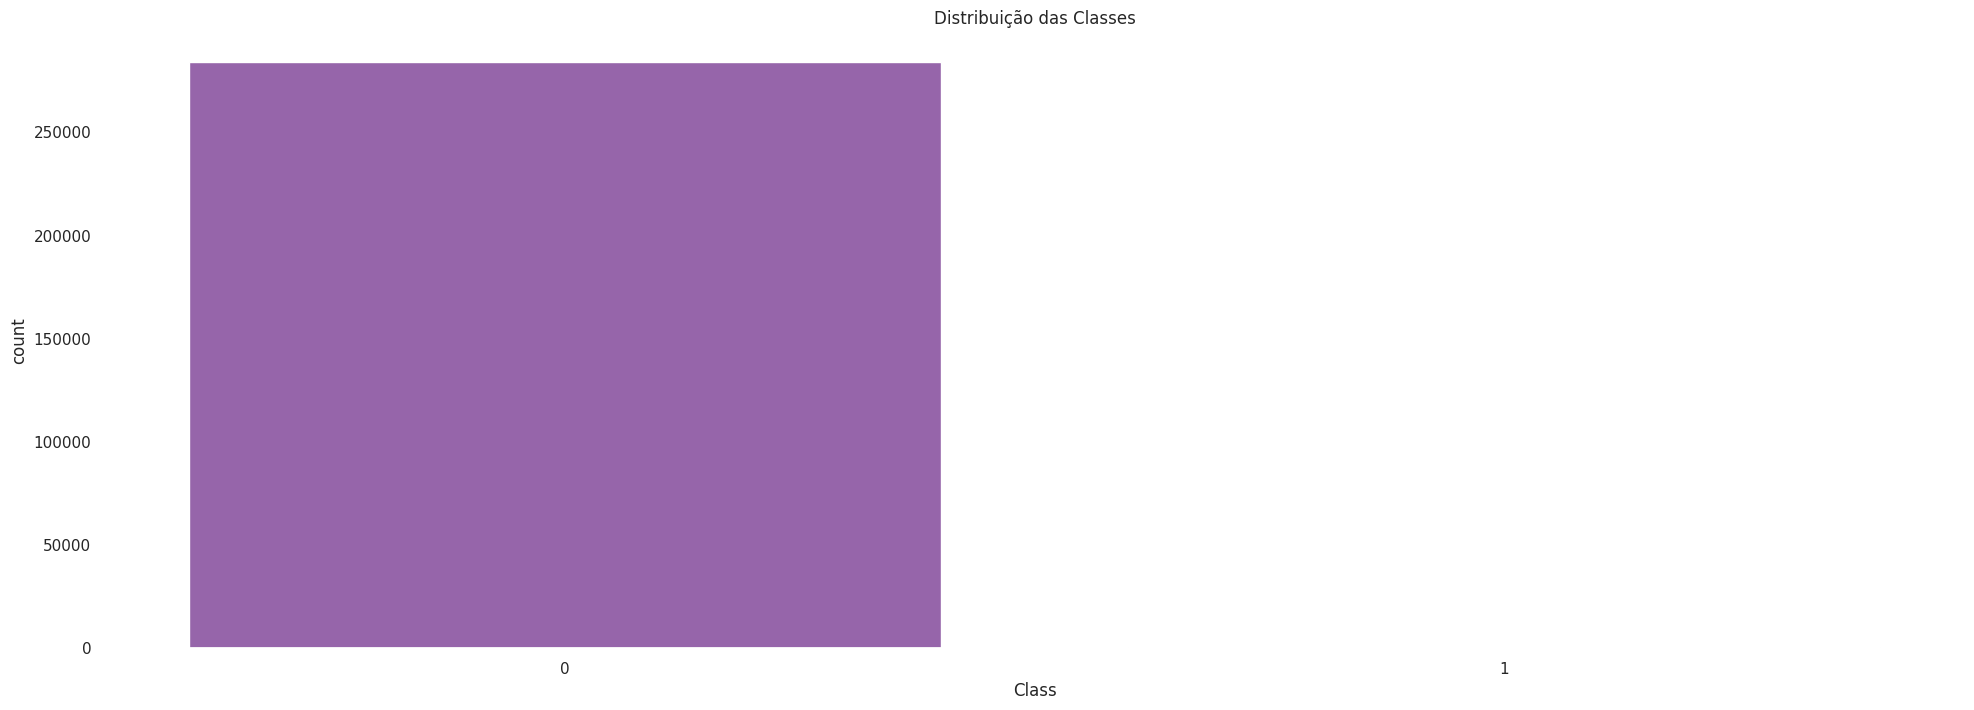

In [22]:
fig, ax = plt.subplots(figsize=(24, 8))
sns.countplot(data=df, x="Class", color='#9b59b6')
sns.despine(left=True)
ax.set_title('Distribuição das Classes')
ax.set_facecolor('White')
ax = plt.plot()

Há uma diferença muito grande em quantidade de transações normais para fraudes, isso vai impactar quando estivermos desenvolvendo nosso modelo de Machine Learning, requerendo mais tarde balancear essa proporção.

Outro ponto a observar é a distribuição da quantidade de transações por tempo e comparar se há um padrão entre o normal e as fraudes.

Text(0, 0.5, 'Transações')

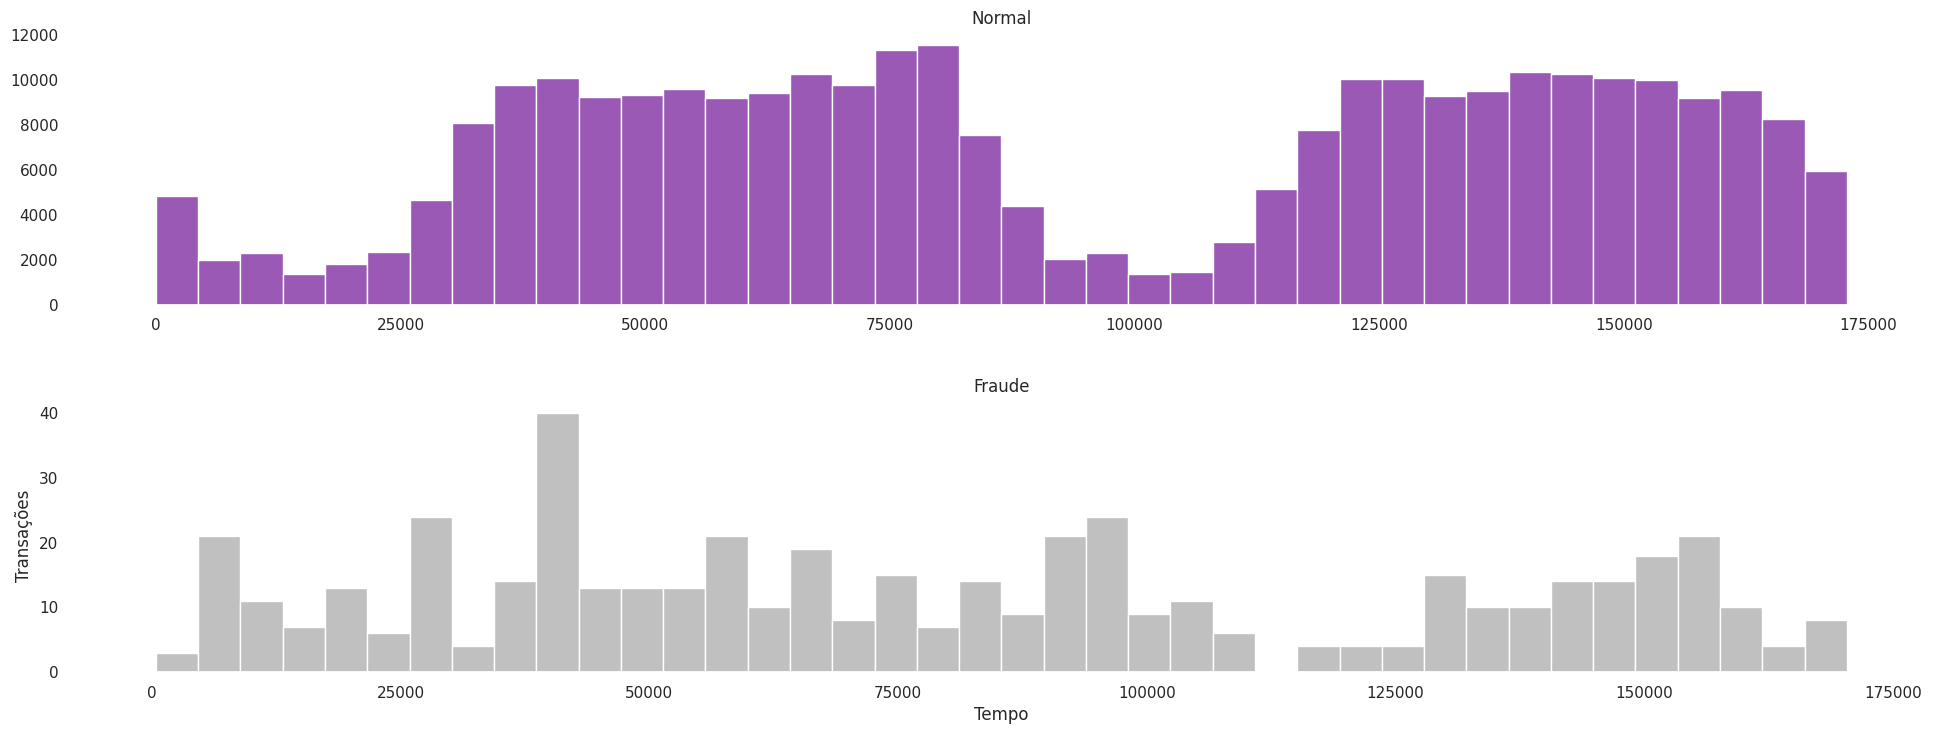

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(24,8))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9,top=0.9, wspace=0.2, hspace=0.35)
num_bins = 40
ax[0].hist(df.Time[df.Class == 0], bins=num_bins, color = "#9b59b6")
ax[0].set_title('Normal')
ax[0].set_facecolor('White')
ax[1].hist(df.Time[df.Class == 1], bins=num_bins, color = "silver")
ax[1].set_title('Fraude')
ax[1].set_facecolor('White')
plt.xlabel('Tempo')
plt.ylabel('Transações')

Ambas às duas possuem um padrão sazonal, daria até em um tópico futuro fazer uma análise de séries temporais, mas para o momento isso basta. Além disso, não conseguimos tirar muitas informações relevantes.

Vamos observar a distribuição do Amount, nesse caso usaremos o boxblot como método de análise para distribuição e identificação de outliers.

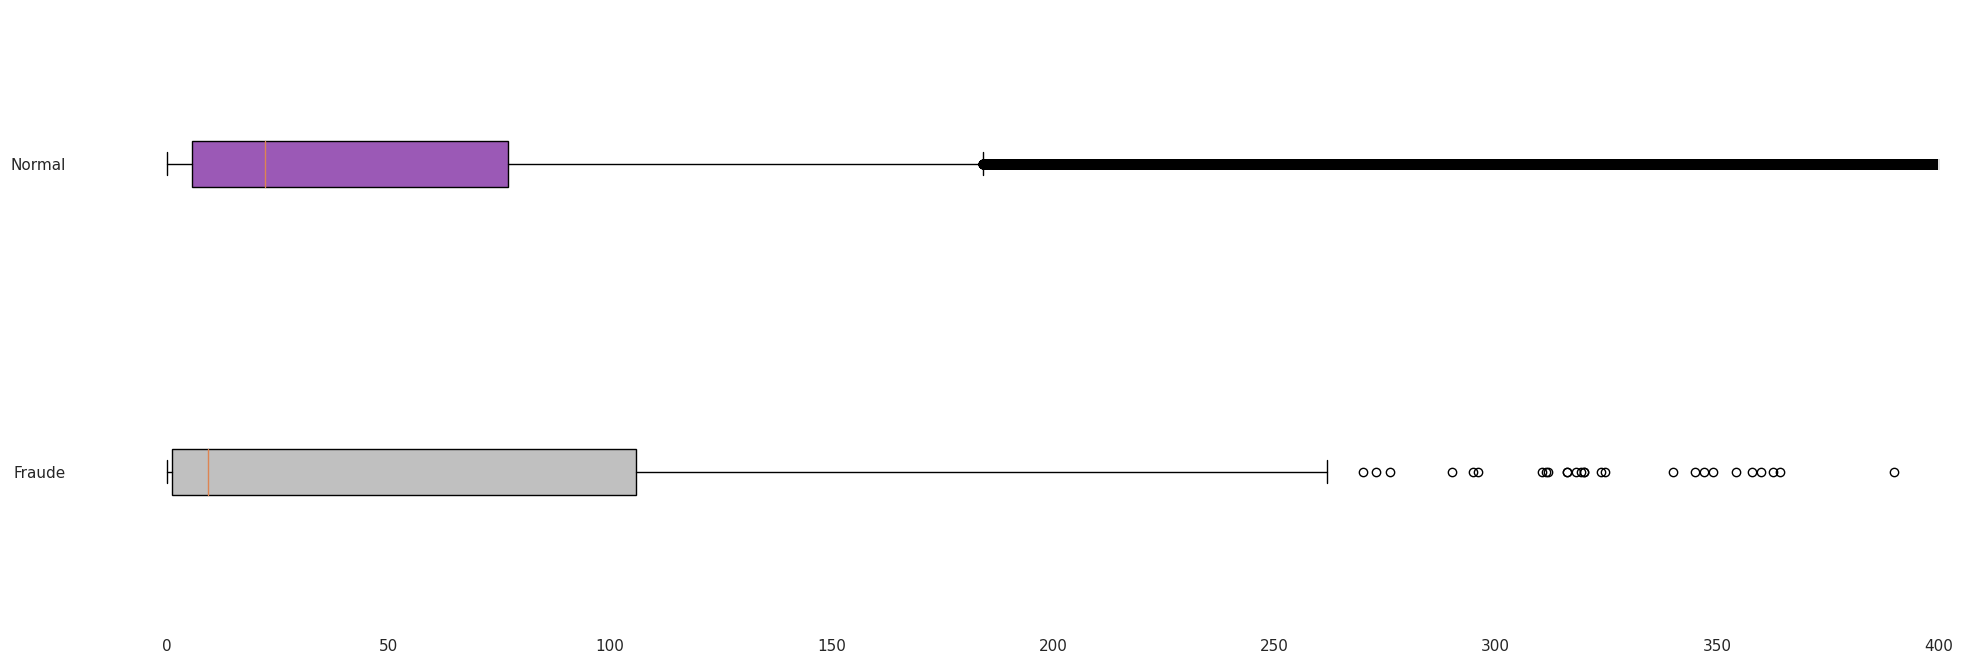

In [26]:
ax, fig = plt.subplots(figsize=(24,8))
c = "purple"
box = plt.boxplot([df.Amount[df.Class == 1], df.Amount[df.Class == 0]], labels=['Fraude', 'Normal'], vert=False, patch_artist=True)
plt.xlim((-20, 400))
fig.set_facecolor('White')
colors = ['silver', '#9b59b6']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

As transações normais possuem muito mais pontos discrepantes, e outro fato é que possui uma mediana maior que as transações fraudulentas. Ou seja, os bandidos tentam atacar usando valores baixos para não serem pegos.

Já que analisamos as variáveis mais importantes, vamos dar uma olhada naquelas que houve a transformação PCA e ver se há uma semelhança na distribuição entre fraude e normal, usando uma função de densidade de probabilidade contínua (kdeplot).

/tmp/ipykernel_49184/1859508079.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class_0[n], label='Normal', shade=True, color='purple')
/tmp/ipykernel_49184/1859508079.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class_1[n], label='Fraude', shade=True, color='gray')
/tmp/ipykernel_49184/1859508079.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class_0[n], label='Normal', shade=True, color='purple')
/tmp/ipykernel_49184/1859508079.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplo

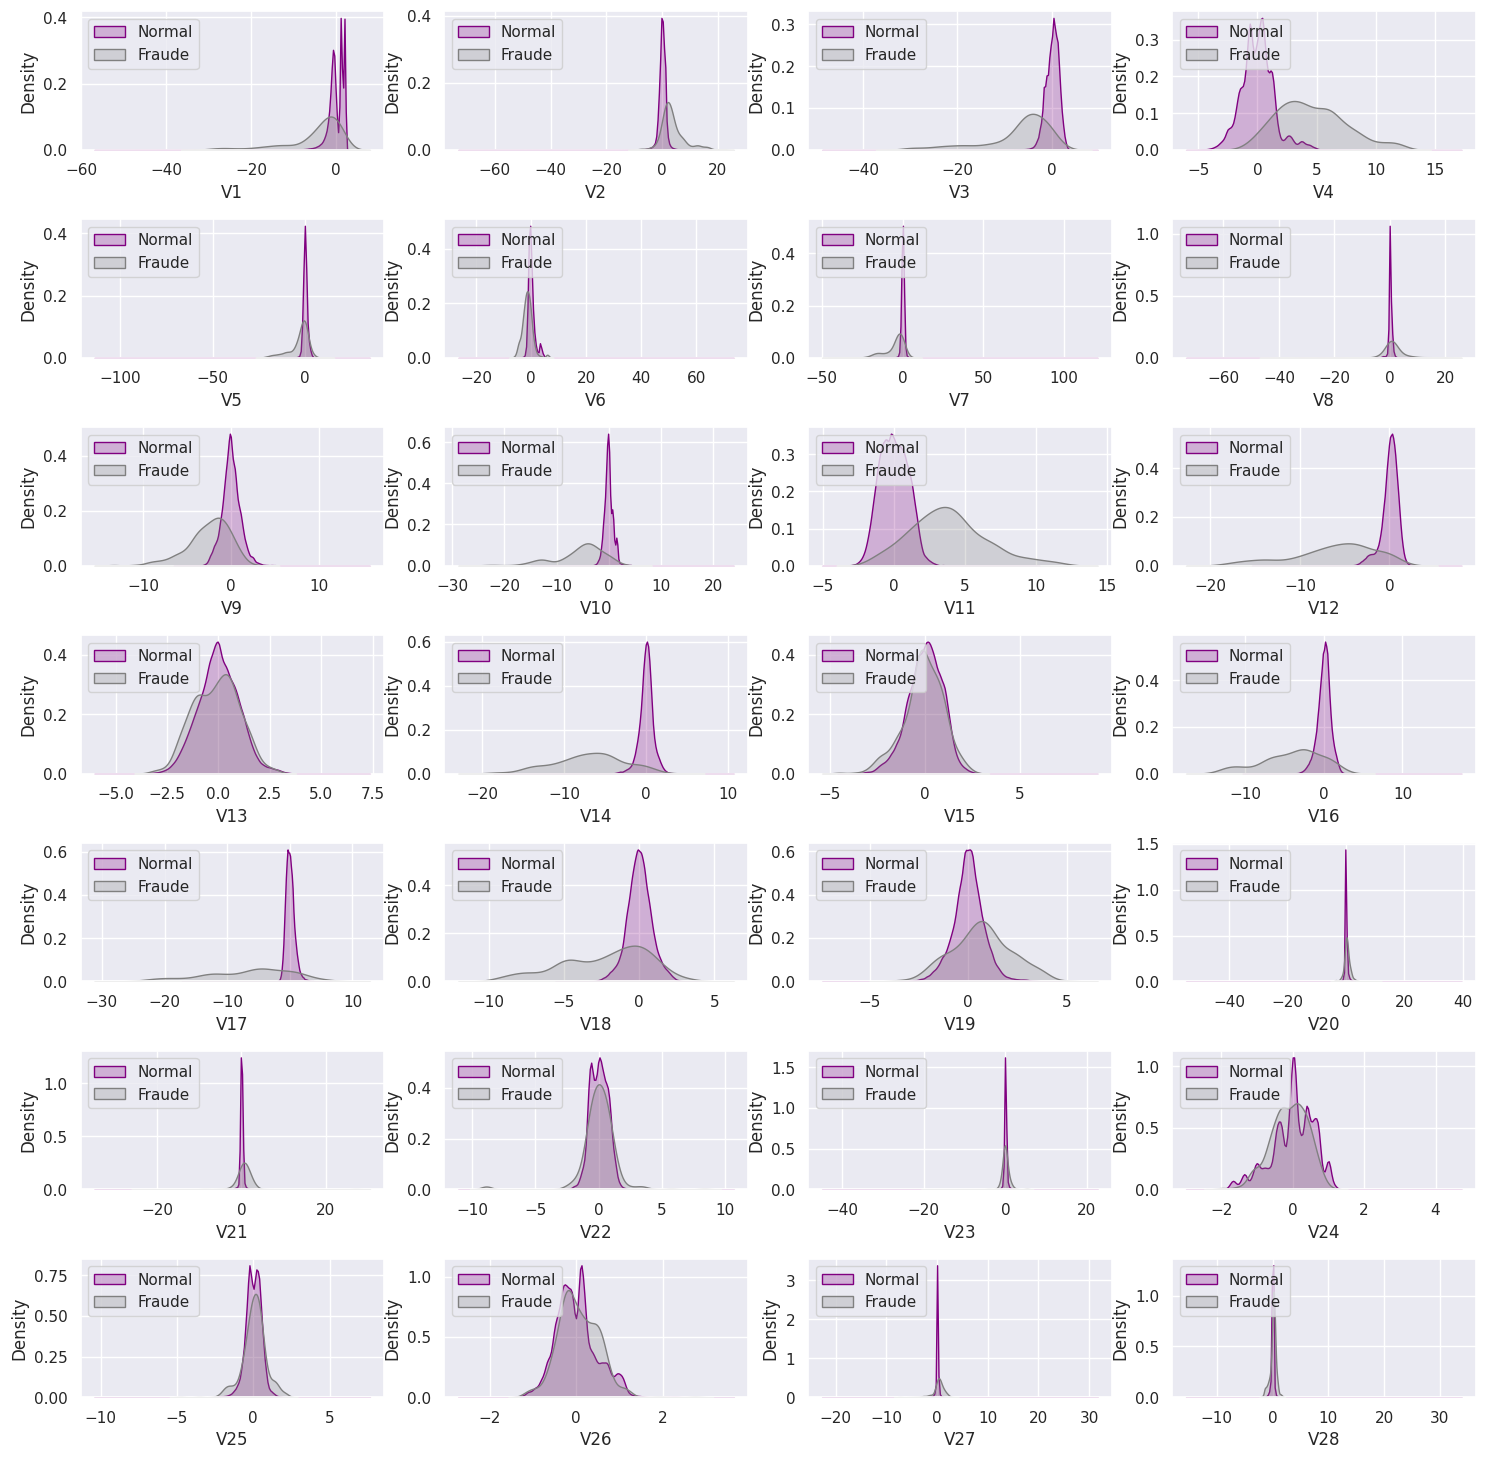

In [27]:
dx = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
class_0 = df[df.Class == 0]
class_1 = df[df.Class == 1]
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
i = 0

for n in dx:
  i += 1
  plt.subplot(7, 4, i)
  sns.kdeplot(class_0[n], label='Normal', shade=True, color='purple')
  sns.kdeplot(class_1[n], label='Fraude', shade=True, color='gray')
  plt.legend(loc='upper left')

As variáveis V13, 15, 22, 24, 25, 26 e 28, são muito semelhantes, isso pode ser um prelúdio, que serão variáveis que não terão um grau de importância para a detecção de fraudes, sendo elas difícil de distinguir ou separar o que é fraude do que não é. Mas claro, isso é só uma hipótese, temos que observar na prática

# Padronização dos dados
Enfim chegamos a um momento crítico e importante, padronizar os dados é uma etapa importantíssima que consiste na transformação dos dados, é uma prática para evitar que seu algoritmo fique enviesado para as variáveis com maior ordem de grandeza.

É um método que tem o objetivo de transformar todas as variáveis na mesma ordem de grandeza, resultando em uma média igual a 0 e um desvio padrão igual a 1. Usaremos o código StandardScaler()

Matematicamente falando o código StandardScaler() usa a fórmula z-score para fazer a padronização dos dados: 

In [28]:
# Copia do dataframe
df_clean = df.copy()

# Padronizar as colunas Time e Amount
scaler = StandardScaler()
df_clean['Amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['Time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))
#ver as 5 primeiras linhas
df_clean.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# Treino e Teste

In [29]:
X = df_clean.drop('Class', axis=1)
y = df_clean.Class

#separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Regressão logística


In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)
importance = model.coef_[0]

In [31]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Matriz de confusão


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     71075
           1     0.8778    0.6220    0.7281       127

    accuracy                         0.9992     71202
   macro avg     0.9386    0.8109    0.8638     71202
weighted avg     0.9991    0.9992    0.9991     71202

AUC: 0.8109



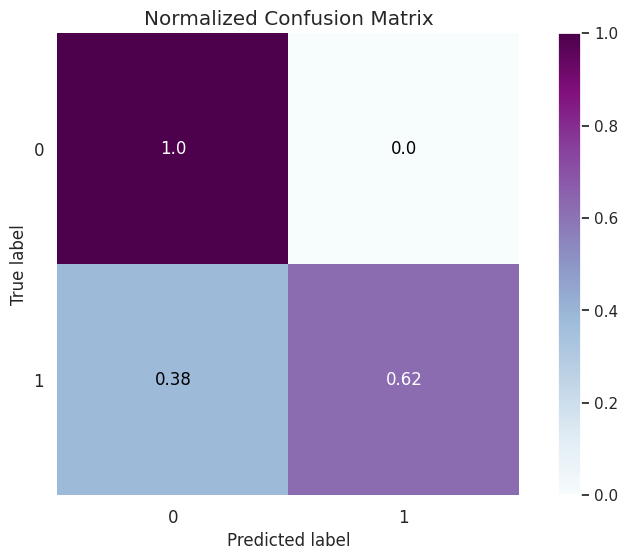

In [37]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap='BuPu')
sns.despine(left=True, bottom=True)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

## RandomUnderSampling (RUS)
As técnicas de subamostragem ou Random Undersampling removem os dados aleatórios do conjunto de dados de treinamento que pertencem à classe majoritária (classe 0) para equilibrar melhor a distribuição da classe.

0    365
1    365
Name: Class, dtype: int64


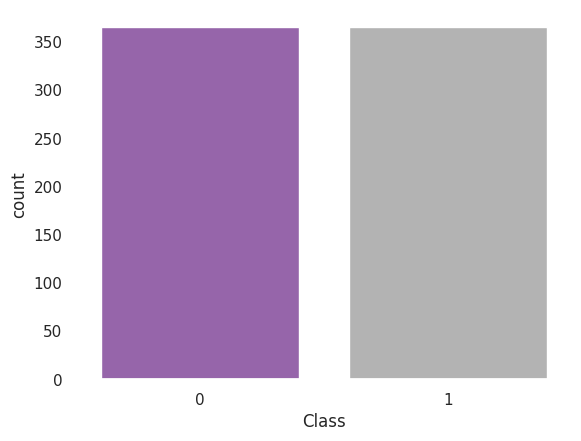

In [52]:
#RUS (Random Under Sampling)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)
# Checar o balanceamento das classes
print(pd.Series(y_rus).value_counts())
# Plotar a nova distribuição de Classes
flatui = ["#9b59b6", "#b3b3b3"]
fig, ax = plt.subplots()
sns.set_palette(flatui)
sns.countplot(x=y_rus)
sns.despine(left=True)
ax.set_facecolor('White')
plt.show()

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9666    0.9830     71075
           1     0.0486    0.9528    0.0924       127

    accuracy                         0.9666     71202
   macro avg     0.5242    0.9597    0.5377     71202
weighted avg     0.9982    0.9666    0.9814     71202

AUC: 0.9597



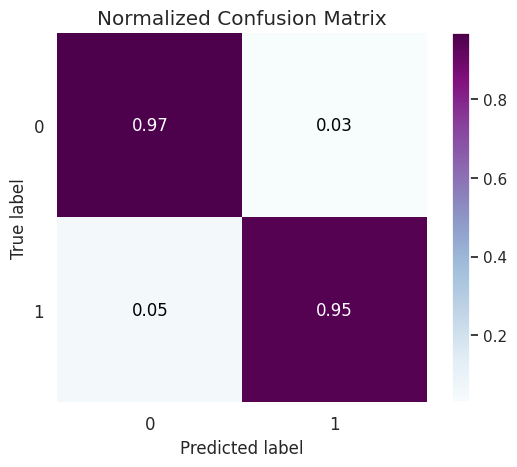

In [41]:
#modelo de regressão logística
model = LogisticRegression()
model.fit(X_rus, y_rus)
importance_rus = model.coef_[0]

# fazer as previsões em cima dos dados de teste
y_pred_rus = model.predict(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rus, normalize=True, cmap='BuPu')
sns.despine(left=True, bottom=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rus, digits=4))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_rus)))

## SMOTE (Over-Sampling)
Synthetic Minority Oversampling Technique ou Técnica de sobreamostragem de minoria sintética é a abordagem mais simples e envolve a duplicação de exemplos na classe minoritária, embora esses exemplos não adiciona nenhuma informação nova ao modelo, esses novos exemplos podem ser sintetizados a partir dos exemplos existentes.

0    213240
1    213240
Name: Class, dtype: int64


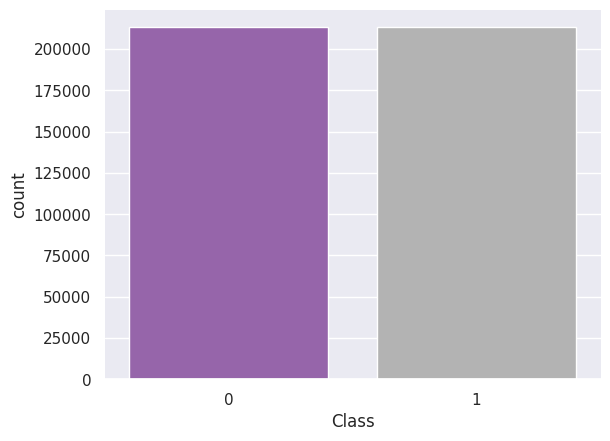

In [59]:
# Balanceamento dos Dados com Over-Sampling (SMOTE)
from imblearn.over_sampling import SMOTE
smo = SMOTE()
X_smo, y_smo = smo.fit_resample(X_train, y_train)
# Checar o balanceamento das classes
print(pd.Series(y_smo).value_counts())
# Plotar a nova distribuição de Classes
flatui = ["#9b59b6", "#b3b3b3"]
sns.set_palette(flatui)
sns.countplot(x=y_smo)
sns.despine(left=True)

## ADASYN
ADASYN (Abordagem de amostragem sintética adaptável para aprendizado desequilibrado), ele é um método muito semelhante ao Smote, mas depois de criar a amostra, ele adiciona valores aleatórios pequenos aos pontos, tornando-os mais realistas. Em outras palavras, em vez de toda a amostra ser linearmente correlacionada à origem, eles têm um pouco mais de variância, ou seja, elas são dispersas.

1    213246
0    213240
Name: Class, dtype: int64


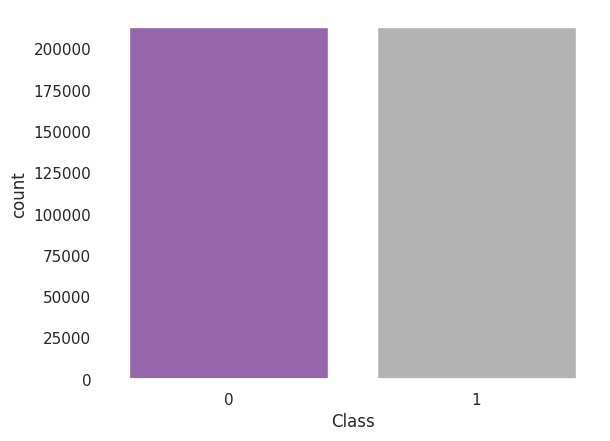

In [50]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_ada).value_counts())

# Plotar a nova distribuição de Classes
flatui = ["#9b59b6", "#b3b3b3"]
fig, ax = plt.subplots()
sns.set_palette(flatui)
sns.countplot(x=y_ada)
sns.despine(left=True)
ax.set_facecolor('White')

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9734    0.9865     71075
           1     0.0602    0.9528    0.1132       127

    accuracy                         0.9734     71202
   macro avg     0.5300    0.9631    0.5498     71202
weighted avg     0.9982    0.9734    0.9849     71202

AUC: 0.9631



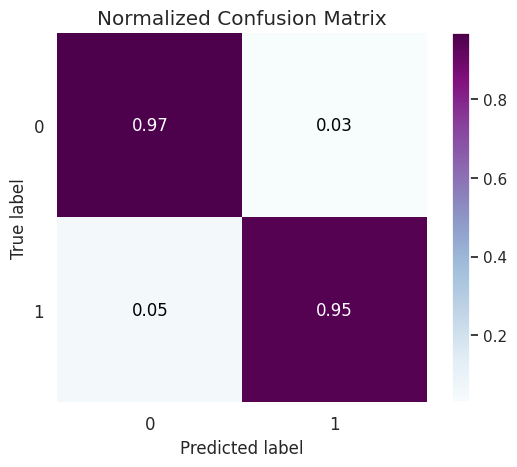

In [60]:
#modelo de regressão logistica
model = LogisticRegression()
model.fit(X_smo, y_smo)
importance_smo = model.coef_[0]

# fazer as previsões em cima dos dados de teste
y_pred_smo = model.predict(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_smo, normalize=True, cmap='BuPu')
sns.despine(left=True, bottom=True)
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_smo, digits=4))
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_smo)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     1.0000    0.9049    0.9501     71075
           1     0.0180    0.9764    0.0354       127

    accuracy                         0.9050     71202
   macro avg     0.5090    0.9406    0.4927     71202
weighted avg     0.9982    0.9050    0.9484     71202

AUC: 0.9406



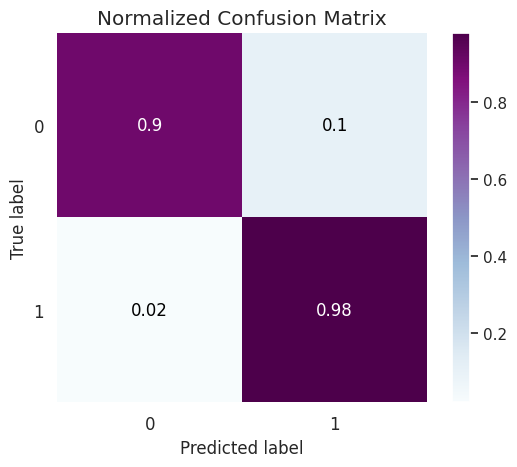

In [53]:

#modelo de regressão logistica
model = LogisticRegression()
model.fit(X_ada, y_ada)
importance_ada = model.coef_[0]

# fazer as previsões em cima dos dados de teste
y_pred_ada = model.predict(X_test)
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_ada, normalize=True, cmap='BuPu')
sns.despine(left=True, bottom=True)
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_ada, digits=4))
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_ada)))

## Near Miss
O algoritmo é semelhante ao RUS, a diferença é que ele observa a distribuição de classes e elimina aleatoriamente amostras da classe majoritária. Quando dois pontos pertencentes a classes diferentes estão muito próximos um do outro na distribuição, esse algoritmo elimina o ponto de dados da classe majoritária, tentando equilibrar a distribuição.

0    365
1    365
Name: Class, dtype: int64


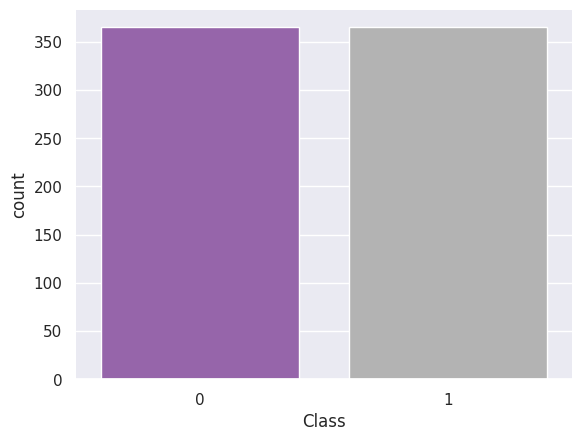

In [55]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X_nr, y_nr = nr.fit_resample(X_train, y_train)
# Checar o balanceamento das classes
print(pd.Series(y_nr).value_counts())
# Plotar a nova distribuição de Classes
flatui = ["#9b59b6", "#b3b3b3"]
sns.set_palette(flatui)
sns.countplot(x=y_nr)
sns.despine(left=True)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.6212    0.7663     71075
           1     0.0045    0.9528    0.0089       127

    accuracy                         0.6218     71202
   macro avg     0.5022    0.7870    0.3876     71202
weighted avg     0.9981    0.6218    0.7650     71202

AUC: 0.7870



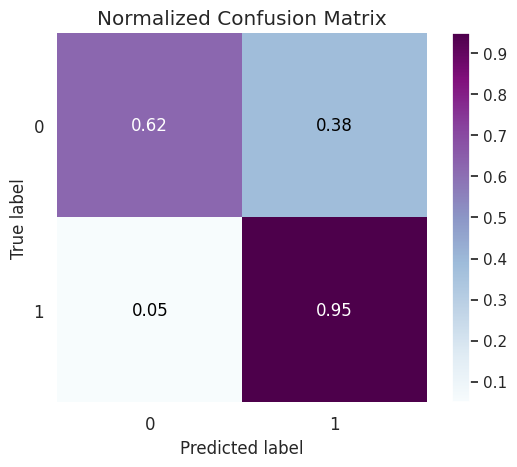

In [56]:
#modelo de regressão logistica
model = LogisticRegression()
model.fit(X_nr, y_nr)
importance_nr = model.coef_[0]
# fazer as previsões em cima dos dados de teste
y_pred_nr = model.predict(X_test)
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_nr, normalize=True, cmap='BuPu')
sns.despine(left=True, bottom=True)
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_nr, digits=4))
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_nr)))

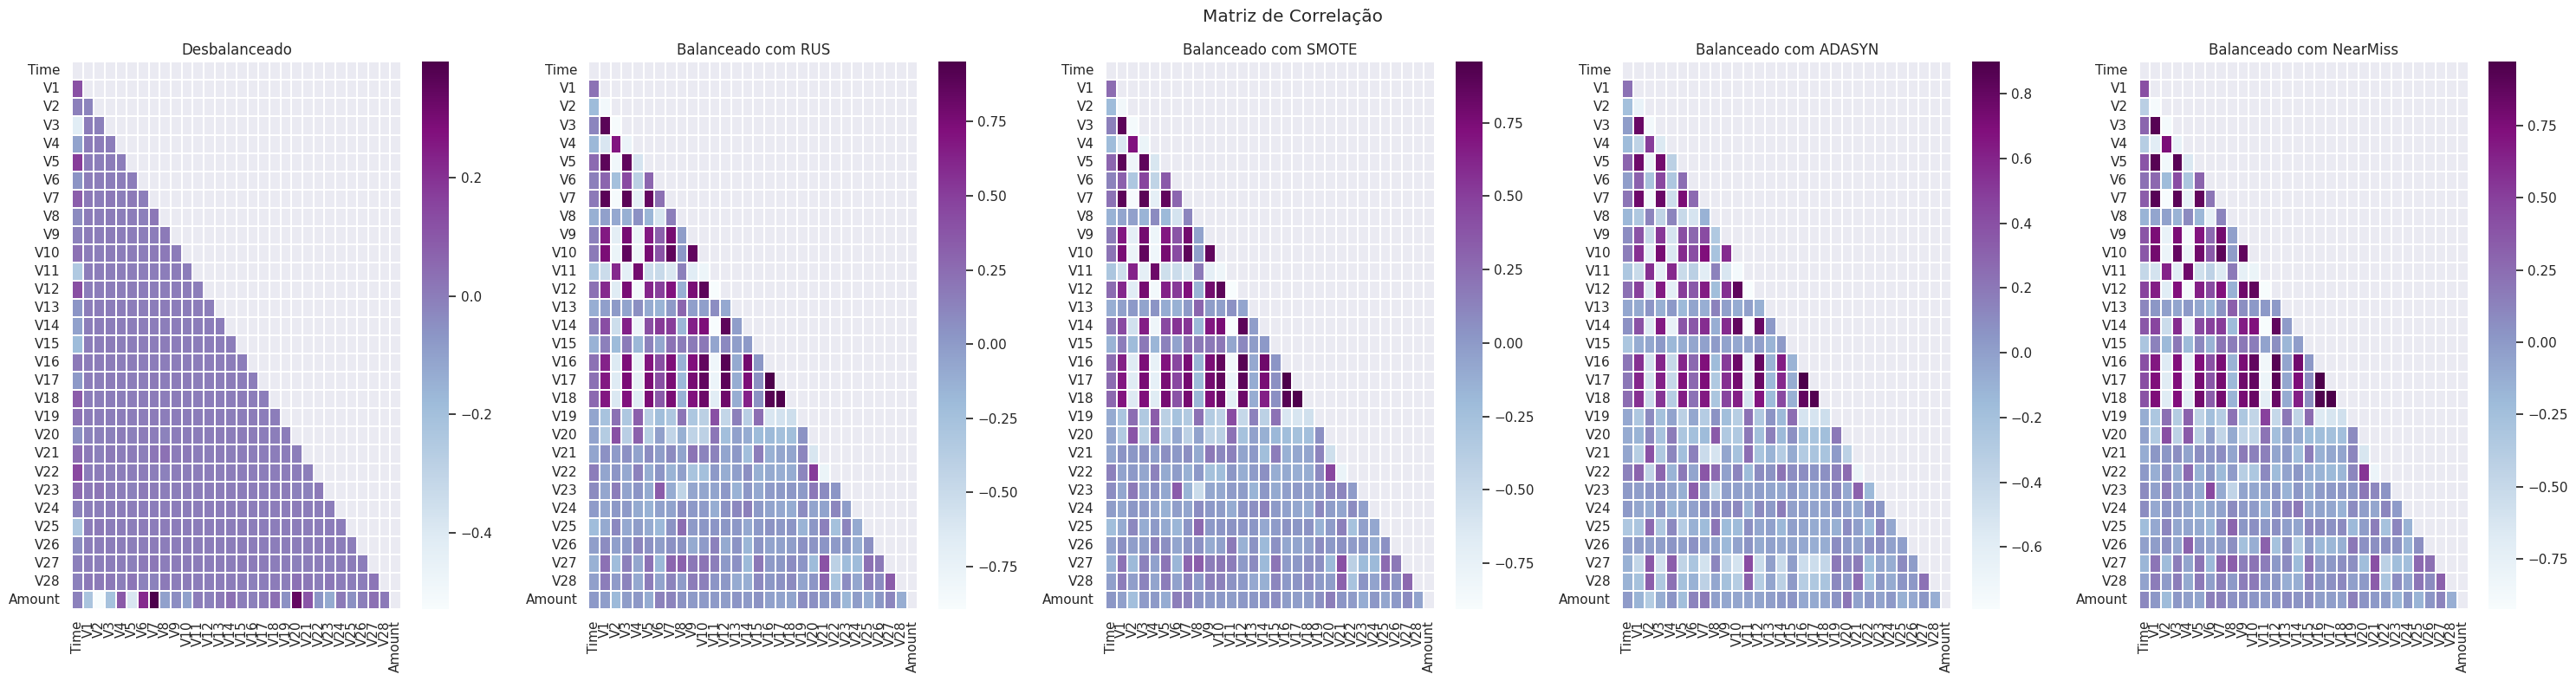

In [61]:
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()
corr_smo = pd.DataFrame(X_smo).corr()
corr_ada = pd.DataFrame(X_ada).corr()
corr_nr = pd.DataFrame(X_nr).corr()
fig, ax = plt.subplots(nrows=1, ncols=5, figsize = (30,8))
fig.suptitle('Matriz de Correlação')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="BuPu", ax=ax[0], mask=np.triu(corr))
ax[0].set_title('Desbalanceado')
sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="BuPu", ax=ax[1],  mask=np.triu(corr_rus))
ax[1].set_title('Balanceado com RUS')
sns.heatmap(corr_smo, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="BuPu", ax=ax[2], mask=np.triu(corr_smo))
ax[2].set_title('Balanceado com SMOTE')
sns.heatmap(corr_ada, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="BuPu", ax=ax[3], mask=np.triu(corr_ada))
ax[3].set_title('Balanceado com ADASYN')

sns.heatmap(corr_nr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="BuPu", ax=ax[4], mask=np.triu(corr_nr))

ax[4].set_title('Balanceado com NearMiss')
plt.tight_layout()

Conseguimos agora ver quais as variáveis se correlacionam proporcional e inversamente. Mas para compreender a influência de cada variável no desempenho do modelo, precisamos explorar os conceitos de coeficientes.

Os modelos de regressão logística são instanciados e se ajustam da mesma forma utilizando o atributo coef_ que contém os coeficientes encontrados para cada variável de entrada. Esses coeficientes podem fornecer a base para uma pontuação bruta de importância do recurso.

Para isso vamos buscar no nosso modelo o coef[1] do nosso melhor modelo (SMOTE), já coletado  e assim gerar um plot com as variáveis mais importantes.

Text(0.5, 1.0, 'Importância de cada feature')

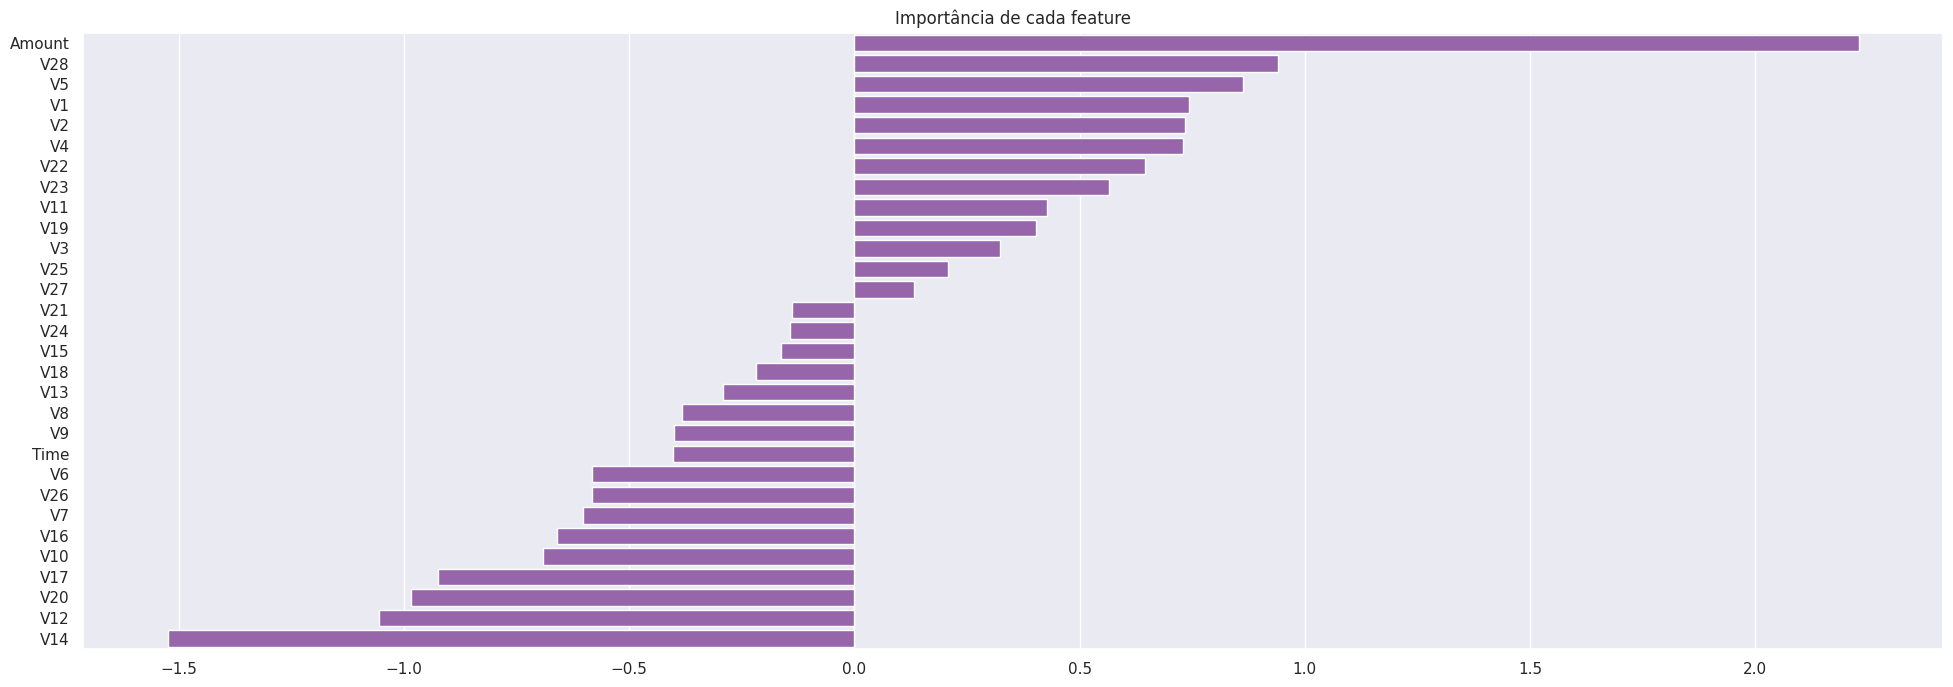

In [63]:
importances = pd.Series(data=importance_smo, index=X.columns.values)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(24,8))
ax = sns.barplot(x=importances, y=importances.index, orient='h', color='#9b59b6')
ax.set_title('Importância de cada feature')

Este é um problema de classificação com classes 0 e 1. Observe que os coeficientes são positivos e negativos. As pontuações positivas indicam uma característica que prevê a classe 1, enquanto as pontuações negativas indicam uma característica que prevê a classe 0.

E analisando nosso gráfico, notamos que a variável Amount, é a que mais impacta na detecção de fraudes, já o V14 é a mais importante para predizer as transações normais.

# Resumo final da ópera
Desenvolver um modelo de Machine Learning realmente não é fácil, ele possui algumas complexidades na qual é necessário explorar para identificar pontos que prejudicaram o desenvolvimento do modelo, como o caso do balanceamento dos dados e a transformação PCA.

O que esse trabalho impacta para quem trabalha com marketing? 

Muita coisa meu caro. Comercial e marketing andam lado a lado, e negócios como e-commerces recebem compras diariamente, imagine essa Machine Learning, ela poderia tornar-se um produto para eles, em que facilitaria a identificação de compras com cartões de créditos fraudados e evitaria complicações para seus clientes, se tornando um diferencial da sua marca.

Sei que foi uma caminhada longa nesse artigo, mas esse é o trabalho de quem vê o mundo através dos dados e assim gera inteligência com uma base forte. Então, meu caro marketeiro.